In [72]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [80]:
# Load in csv
raw_df = pd.read_csv("../Project3/dataforfinalproject/RECS_COMBINED_DATA.csv")
raw_df = raw_df.drop(columns=['RECSYEAR', 
                              'DOEID', 
                              'PERIODFO', 
                              'PERIODLP', 
                              'PERIODEL', 
                              'PERIODNG'])
raw_df.head()
raw_df.shape

C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (148,149,150,151) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(26973, 193)

In [81]:
scaled_data = preprocessing.scale(raw_df.T)

In [82]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [83]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

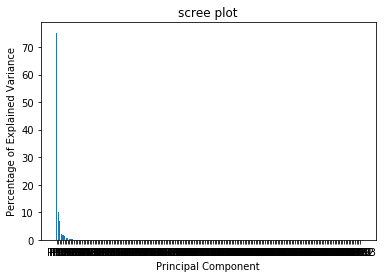

In [84]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('scree plot')

plt.show()

In [85]:
pca_df = pd.DataFrame(pca_data, columns=labels)

In [91]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193
0,-33.259283,-0.681139,0.935747,-0.871146,-1.264086,-0.146179,0.185484,-0.503775,-0.130467,-0.174505,...,1.075514e-06,-1.234312e-07,-1.244707e-07,2.242130e-14,2.298292e-15,7.888655e-15,-9.254750e-16,9.544449e-15,-9.883153e-15,-2.888315e-15
1,-33.199001,-0.653181,0.964174,-0.872119,-1.229627,-0.150584,0.186920,-0.494728,-0.130986,-0.178364,...,-2.005165e-07,-7.604579e-08,2.319444e-09,7.242471e-15,3.150041e-15,6.207925e-15,9.161075e-15,6.796647e-15,-8.410807e-15,2.099189e-14
2,-33.256213,-0.680558,0.936708,-0.857415,-1.250556,-0.144520,0.192188,-0.505843,-0.128091,-0.176207,...,-2.419466e-07,-1.678362e-07,-1.597154e-08,2.110638e-14,2.399339e-15,7.748685e-15,-7.979728e-17,9.336282e-15,-9.829811e-15,5.364806e-14
3,-33.315516,-0.713247,0.910217,-0.867901,-1.284463,-0.142351,0.179881,-0.509810,-0.125554,-0.175950,...,5.575321e-08,-1.149495e-07,5.427260e-08,1.601323e-14,2.744333e-15,7.239760e-15,3.466845e-15,8.187895e-15,-9.164978e-15,5.613565e-15
4,-33.040053,-0.611099,1.023423,-0.754035,-1.082259,-0.114192,0.140469,-0.514755,-0.088630,-0.183212,...,-3.175601e-09,-1.228770e-08,-4.403517e-09,1.309369e-14,2.955752e-15,6.676409e-15,5.313458e-15,7.611967e-15,-8.795482e-15,2.822742e-14
5,-33.308485,-0.709103,0.914675,-0.869101,-1.280043,-0.143597,0.177653,-0.511659,-0.125597,-0.172942,...,8.609479e-08,1.407542e-07,5.235967e-08,2.124342e-14,2.300894e-15,7.767983e-15,-2.090342e-16,9.253015e-15,-9.786876e-15,-1.847932e-13
6,-33.234350,-0.663852,0.944242,-0.860888,-1.257085,-0.141574,0.185886,-0.505907,-0.131760,-0.173566,...,-1.886632e-08,-5.675981e-08,7.677504e-09,1.635671e-14,2.807216e-15,7.128521e-15,3.066991e-15,8.638923e-15,-9.285541e-15,3.763136e-14
7,-33.181116,-0.649976,0.964832,-0.846548,-1.232923,-0.143919,0.190804,-0.499091,-0.129078,-0.178093,...,6.035765e-09,1.398622e-08,-3.365362e-08,1.513546e-14,2.704000e-15,7.151398e-15,3.820728e-15,7.934625e-15,-9.067400e-15,-8.085720e-14
8,-33.268155,-0.691827,0.927827,-0.870856,-1.285662,-0.147006,0.181294,-0.502563,-0.131797,-0.175691,...,-3.075581e-07,-7.747897e-08,-3.177412e-08,1.111437e-14,3.086290e-15,6.800116e-15,6.699502e-15,7.365636e-15,-8.682725e-15,1.839986e-13
9,-33.285032,-0.695656,0.922493,-0.872355,-1.283962,-0.145931,0.183209,-0.505644,-0.130586,-0.173648,...,-1.636900e-08,-7.518367e-08,-8.881704e-09,8.673617e-15,3.074797e-15,6.290324e-15,8.337081e-15,7.049916e-15,-8.537875e-15,3.888903e-14


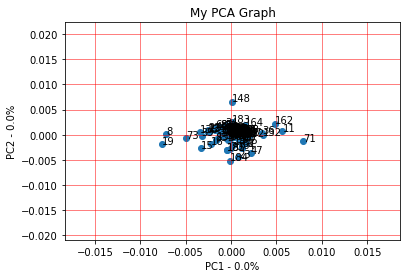

In [109]:
plt.scatter(pca_df.PC102, pca_df.PC113)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[101]))
plt.ylabel('PC2 - {0}%'.format(per_var[112]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC102.loc[sample], pca_df.PC113.loc[sample]))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.show()


In [105]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:20].index.values
print(loading_scores[top_10_features])

26402    0.006909
330      0.006897
22577    0.006895
21428    0.006884
2596     0.006879
10585    0.006879
856      0.006878
24719    0.006876
26059    0.006874
21829    0.006873
470      0.006872
23200    0.006872
23937    0.006872
18250    0.006869
13812    0.006869
2188     0.006868
1973     0.006868
22672    0.006867
23883    0.006867
3554     0.006867
dtype: float64


In [ ]:
features = ['RECSYEAR',
'DOEID',
'REGIONC',
'DIVISION',
'TYPEHUQ',
'CELLAR',
'STORIES',
'PRKGPLC1',
'YEARMADE',
'OCCUPYY',
'BEDROOMS',
'NCOMBATH',
'NHAFBATH',
'OTHROOMS',
'TOTROOMS',
'DOOR1SUM',
'WINDOWS',
'ADQINSUL',
'DRAFTY',
'UGASHERE',
'FUELPOOL',
'SIZRFRI1',
'TYPERFR1',
'AGERFRI1',
'ICE',
'SIZRFRI2',
'TYPERFR2',
'AGERFRI2',
'NUMFREEZ',
'SIZFREEZ',
'AGEFRZR',
'STOVENFUEL',
'OVENUSE',
'AMTMICRO',
'NUMMEAL',
'TOASTER',
'COFFEE',
'DWASHUSE',
'WASHLOAD',
'WASHTEMP',
'RNSETEMP',
'DRYRUSE',
'EQUIPM',
'FUELHEAT',
'EQUIPAGE',
'PROTHERM',
'TEMPHOME',
'TEMPGONE',
'TEMPNITE',
'EQUIPAUX',
'REVERSE',
'WARMAIR',
'STEAMR',
'PERMELEC',
'PIPELESS',
'ROOMHEAT',
'WOODKILN',
'CARRYEL',
'CARRYKER',
'CHIMNEY',
'RANGE',
'DIFEQUIP',
'ELECAUX',
'UGASAUX',
'LPGAUX',
'FOKRAUX',
'WOODAUX',
'OTHERAUX',
'ATTCHEAT',
'GARGHEAT',
'COOLTYPE',
'AGECENAC',
'USECENAC',
'NUMBERAC',
'WWACAGE',
'USEWWAC',
'NUMCFAN',
'FUELH2O',
'WHEATAGE',
'WHEATSIZ',
'LGTOUTNUM',
'ESDISHW',
'PGASHEAT',
'LPGPAY',
'FOPAY',
'HHSEX',
'HHAGE',
'EMPLOYHH',
'HOUSEHOLDER_RACE',
'NHSLDMEM',
'ATHOME',
'MONEYPY',
'ELWATER',
'LPOTHER',
'TOTCSQFT',
'TOTHSQFT',
'TOTUSQFT',
'NWEIGHT',
'CDD65',
'HDD65',
'GALLONLP',
'CUFEETNG',
'BTUEL',
'BTUELSPH',
'BTUELCOL',
'BTUELWTH',
'BTUELRFG',
'BTUELOTH',
'BTULP',
'BTULPSPH',
'BTULPWTH',
'BTULPOTH',
'BTUNG',
'BTUNGSPH',
'BTUNGWTH',
'BTUNGOTH',
'BTUFO',
'BTUFOSPH',
'BTUFOWTH',
'BTUFOOTH',
'DOLLARNG',
'DOLNGSPH',
'DOLNGWTH',
'DOLNGOTH',
'DOLLAREL',
'DOLELSPH',
'DOLELCOL',
'DOLELWTH',
'DOLELRFG',
'DOLELOTH',
'DOLLARLP',
'DOLLPSPH',
'DOLLPWTH',
'DOLLPOTH',
'DOLLARFO',
'DOLFOSPH',
'DOLFOWTH',
'DOLFOOTH',
'GALLONFO',
'TOTALBTU',
'TOTALBTUSPH',
'TOTALBTUWTH',
'TOTALBTUOTH',
'TOTALDOLLAR',
'TOTALDOLSPH',
'TOTALDOLWTH',
'TOTALDOLOTH',
'WOODAMT',
'PERIODFO',
'PERIODLP',
'PERIODEL',
'PERIODNG',
'KOWNRENT',
'SWIMPOOL',
'POOL',
'RECBATH',
'FUELTUB',
'NUMFRIG',
'UPRTFRZR',
'STOVEN',
'STOVE',
'OVEN',
'MICRO',
'DISHWASH',
'CWASHER',
'DRYER',
'DRYRFUEL',
'DNTHEAT',
'THERMAIN',
'AIRCOND',
'CENACHP',
'USEEL',
'ELWARM',
'ELCOOL',
'ELFOOD',
'ELOTHER',
'UGWARM',
'UGWATER',
'UGCOOK',
'UGOTH',
'USELP',
'LPWARM',
'LPWATER',
'LPCOOK',
'USEFO',
'FOWARM',
'FOWATER',
'USEWOOD',
'WOODLOGS',
'WDPELLET',
'WDOTHER',
'WDWARM',
'WDWATER',
'USESOLAR',
'SOLWATER',
'SOLOTHER',
'TVAUDIOEQUIP',
'PCOFFEQUIP',
'PHONE']